In [3]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
# Use datasets/datasets.py methods in this

In [21]:
# Metrics to visualize
# - Most frequent words
# - Least frequent words
# - Document Distribution
#   - Length

In [22]:
# Load dataset
# Load saved data
dataset = torch.load('dataset.pth')
print(dataset.keys())

dict_keys(['examples', 'idx2doc', 'term_freq_dict'])


In [23]:
len(dataset['examples'])

26095086

In [32]:
clean_dict = dataset['term_freq_dict']

blacklist = ['to', 'that', 'for', 'you', 'be', 'have', 'are',\
             'not', 'with', 'was', 'the', 'of', 'a', 'and', 'i',\
             'is', 'it', 'on', 'this', 'i', 'in','as','or','do','if',\
             'can','an','there','would','what','will','my','we','all',\
             'one''but','they','from','by','at', 'one','he', 'about',\
             'has','so','your', 'any', 'no', 'who', 'me', 'which', '_',\
            's', 'nt', 'but']

for b in blacklist:
    try:
        del clean_dict[b]
    except:
        pass

vocab = list(clean_dict.keys())
freq = list(clean_dict.values())

In [1]:
# sort your values in descending order
indSort = np.argsort(freq)[::-1]

# rearrange your data
labels = np.array(vocab)[indSort][:10]
values = np.array(freq)[indSort][:10]

indexes = np.arange(len(labels))

bar_width = 0.56

plt.bar(indexes, values)

# add labels
plt.xticks(indexes , labels)
plt.show()
str = ""
for l in labels:
    str += f",'{l}'"
print(str)

NameError: name 'np' is not defined

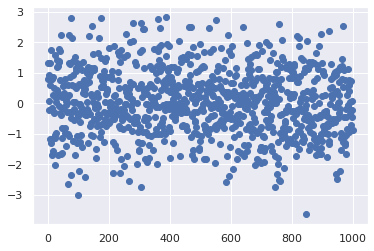

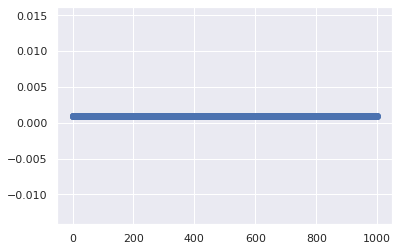

In [108]:
%matplotlib inline
DIM = 1000
"""
Randn Distribution
"""

norm = torch.randn(1, DIM)
plt.scatter(range(DIM), norm.numpy()[0])#, bins=30, normed=True)
plt.show()

uni = torch.Tensor(1, DIM)
uni.fill_(1/DIM)
plt.scatter(range(DIM), uni.numpy()[0])#, bins=30, normed=True)
plt.show()

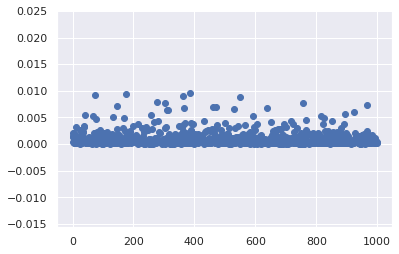

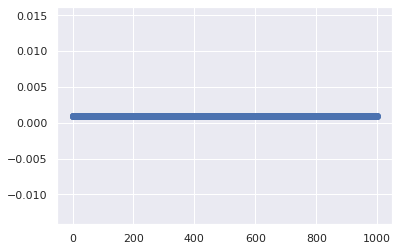

In [109]:
"""
Randn Distribution into softmax
"""
import torch.nn.functional as F

soft_norm = F.softmax(norm, dim=1)
plt.scatter(range(DIM), soft_norm.numpy()[0])#, bins=30, normed=True)
plt.show()

soft_uni = F.softmax(uni, dim=1)
plt.scatter(range(DIM), soft_uni.numpy()[0])#, bins=30, normed=True)
plt.show()

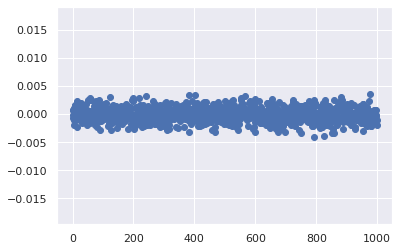

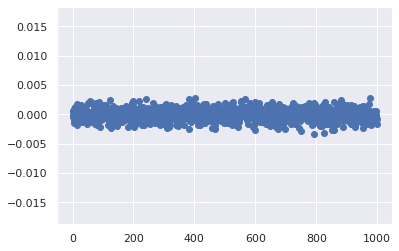

In [110]:
"""
Soft transformed by normal
"""
import torch.nn.functional as F

new_rand = torch.randn(1, DIM)

transformation = torch.matmul(torch.t(soft_norm), new_rand)
plt.scatter(range(DIM), transformation.numpy()[0])#, bins=30, normed=True)
plt.show()

uni_transformation = torch.matmul(torch.t(soft_uni), new_rand)
plt.scatter(range(DIM), uni_transformation.numpy()[0])#, bins=30, normed=True)
plt.show()